<h1>Лабораторна робота №3 <h1>
<h2>Пруніч Сергій МІТ-31<h2>

In [2]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, recall_score, f1_score, roc_auc_score, confusion_matrix, roc_curve, classification_report
import matplotlib.pyplot as plt
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

Accuracy: 0.90
Recall: 0.86
F1 Score: 0.89
AUC-ROC: 0.95
Матриця плутанини:
[[97  7]
 [13 83]]


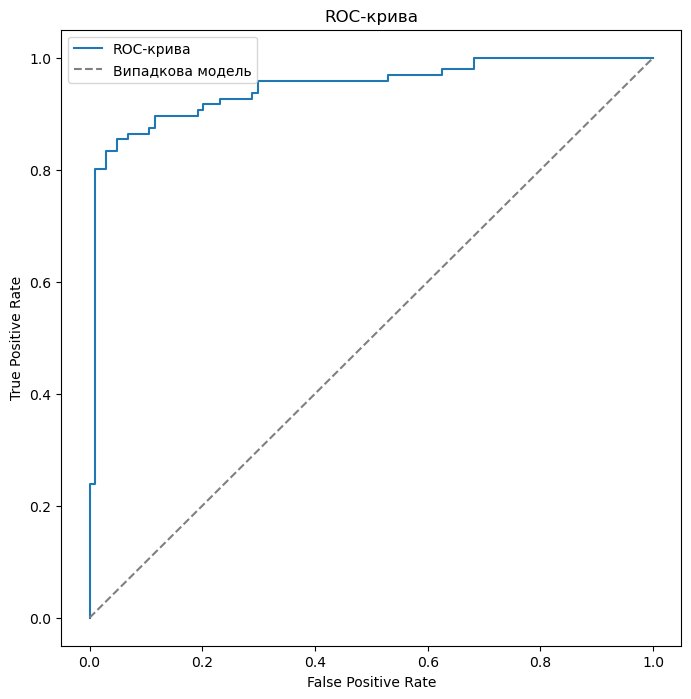

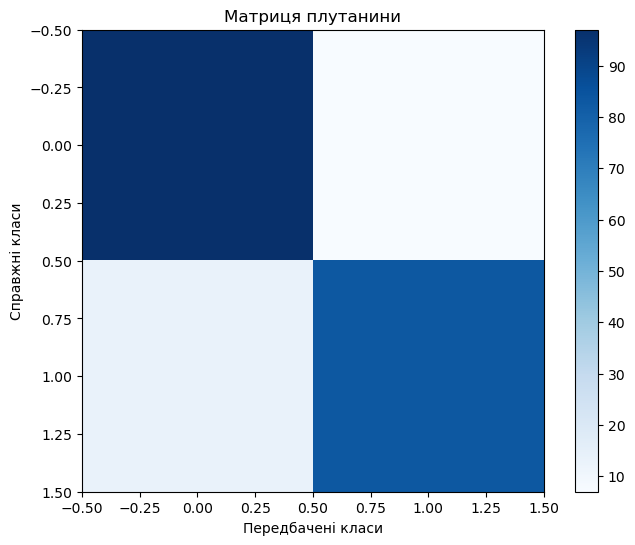

In [6]:
# Бінарна класифікація на згенерованому наборі даних

# Згенеруємо набір даних для бінарної класифікації
X, y = make_classification(n_samples=1000, n_features=2, n_informative=2, n_redundant=0, n_clusters_per_class=1, random_state=42)

# Розділімо дані на тренувальний та тестовий набори
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Ініціалізуємо та навчаємо класифікатор (логістична регресія)
classifier = LogisticRegression()
classifier.fit(X_train, y_train)

# Прогнозуємо на тестовому наборі
y_pred = classifier.predict(X_test)

# Оцінюємо ефективність класифікатора
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, classifier.predict_proba(X_test)[:, 1])

# Виводимо результати
print(f'Accuracy: {accuracy:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1 Score: {f1:.2f}')
print(f'AUC-ROC: {roc_auc:.2f}')

# Виводимо матрицю плутанини
confusion = confusion_matrix(y_test, y_pred)
print(f'Матриця плутанини:\n{confusion}')

# Виводимо ROC-криву
fpr, tpr, thresholds = roc_curve(y_test, classifier.predict_proba(X_test)[:, 1])
plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, label=f'ROC-крива')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Випадкова модель')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-крива')
plt.legend()
plt.show()

# Матриця плутанини
plt.figure(figsize=(8, 6))
plt.imshow(confusion, cmap='Blues', interpolation='nearest')
plt.colorbar()
plt.title('Матриця плутанини')
plt.ylabel('Справжні класи')
plt.xlabel('Передбачені класи')
plt.show()

In [9]:
# Мультикласова класифікація на згенерованому наборі даних

X, y = make_classification(n_samples=1000, n_features=2, n_classes=3, n_clusters_per_class=1, n_redundant=0, random_state=42)
# Роздіління даних на тренувальний та тестовий набори
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Ініціалізація та навчання класифікаторів
classifiers = {
    'Logistic Regression': LogisticRegression(),
    'SVC': SVC(),
    'Random Forest': RandomForestClassifier()
}

for name, clf in classifiers.items():
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)

    # Оцінка ефективності класифікатора
    accuracy = accuracy_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    confusion = confusion_matrix(y_test, y_pred)

    # Виведення результатів
    print(f'\nClassifier: {name}')
    print(f'Accuracy: {accuracy:.2f}')
    print(f'Recall: {recall:.2f}')
    print(f'F1 Score: {f1:.2f}')
    print(f'Confusion Matrix:\n{confusion}')

    


Classifier: Logistic Regression
Accuracy: 0.85
Recall: 0.85
F1 Score: 0.86
Confusion Matrix:
[[55  4  8]
 [ 9 47  1]
 [ 5  2 69]]

Classifier: SVC
Accuracy: 0.89
Recall: 0.89
F1 Score: 0.89
Confusion Matrix:
[[59  0  8]
 [11 46  0]
 [ 2  1 73]]

Classifier: Random Forest
Accuracy: 0.90
Recall: 0.90
F1 Score: 0.90
Confusion Matrix:
[[60  2  5]
 [ 9 48  0]
 [ 3  1 72]]


<p>Порівнявши між собою Логістичну регресію, метод опорних векторів і Random Forest ми бачимо що великої різниці у показниках метрик немає, кожна модель доволі гарно впоралась</p>

In [9]:
# Мультилейб класифікація на реальному наборі даних з інтернету

data = pd.read_csv('multi-class.csv')
X = data['ABSTRACT']
columns = ['Computer Science', 'Physics', 'Mathematics', 'Statistics', 'Quantitative Biology', 'Quantitative Finance']
y = data[columns].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Векторизація тексту за допомогою TF-IDF
vectorizer = TfidfVectorizer(max_features=5000)
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

# Ініціалізація та навчання класифікатора MultinomialNB
classifier = OneVsRestClassifier(MultinomialNB())
classifier.fit(X_train_tfidf, y_train)

# Прогнозування міток на тестовому наборі
y_pred = classifier.predict(X_test_tfidf)

# Оцінка точності та інші метрики
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

report = classification_report(y_test, y_pred)
print(f'Classification Report:\n{report}')


Accuracy: 0.6214541120381406
Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.86      0.81      1692
           1       0.94      0.80      0.86      1226
           2       0.84      0.75      0.79      1150
           3       0.74      0.76      0.75      1069
           4       0.00      0.00      0.00       122
           5       0.00      0.00      0.00        45

   micro avg       0.81      0.77      0.79      5304
   macro avg       0.55      0.53      0.54      5304
weighted avg       0.79      0.77      0.78      5304
 samples avg       0.79      0.80      0.78      5304

